In [10]:
import pandas as pd
import numpy as np
from PIL import Image
from skimage import transform
import cv2
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Dropout, Flatten

In [11]:
images_path = 'sign-language-for-numbers/Sign Language for Numbers'
classes = "0 1 2 unknown".split()
classes

['0', '1', '2', 'unknown']

(100, 72)


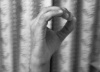

In [12]:
image = Image.open(images_path + '/0/zero_1.jpg')
print(image.size)
image

In [13]:
img = cv2.imread(images_path + '/0/zero_1.jpg')
img.shape

(72, 100, 3)

In [14]:
data_generator = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, horizontal_flip=True)

data_batches = data_generator.flow_from_directory(images_path, class_mode='categorical',
                                                 target_size=(100, 72), batch_size=64)

Found 6000 images belonging to 4 classes.


In [15]:
model = Sequential()

model.add(Conv2D(32, kernel_size=4, padding='same', kernel_initializer='he_uniform', input_shape=(100,72,3)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=4, padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())

model.add(Dense(len(classes), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 100, 72, 32)       1568      
_________________________________________________________________
batch_normalization_7 (Batch (None, 100, 72, 32)       128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 100, 72, 64)       32832     
_________________________________________________________________
batch_normalization_8 (Batch (None, 100, 72, 64)       256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 36, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 36, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 115200)            0         
__________

In [16]:
checkpoint = keras.callbacks.ModelCheckpoint('model2_{epoch:02d}_{acc:.2f}.h5', period=10) 

history = model.fit_generator(data_batches, steps_per_epoch=(6000//64), epochs=50, callbacks=[checkpoint])


Epoch 1/50
93/93 [==============================] - 207s 2s/step - loss: 1.2731 - acc: 0.4615
Epoch 2/50
93/93 [==============================] - 211s 2s/step - loss: 1.0263 - acc: 0.5656
Epoch 3/50
93/93 [==============================] - 212s 2s/step - loss: 0.9327 - acc: 0.6186
Epoch 4/50
93/93 [==============================] - 213s 2s/step - loss: 0.8582 - acc: 0.6587
Epoch 5/50
93/93 [==============================] - 214s 2s/step - loss: 0.8101 - acc: 0.6794
Epoch 6/50
93/93 [==============================] - 212s 2s/step - loss: 0.8012 - acc: 0.6784
Epoch 7/50
93/93 [==============================] - 215s 2s/step - loss: 0.7324 - acc: 0.7212
Epoch 8/50
93/93 [==============================] - 215s 2s/step - loss: 0.7369 - acc: 0.7147
Epoch 9/50
93/93 [==============================] - 215s 2s/step - loss: 0.7435 - acc: 0.7109
Epoch 10/50
93/93 [==============================] - 213s 2s/step - loss: 0.6641 - acc: 0.7412
Epoch 11/50
93/93 [==============================] - 214s 2

In [18]:
hist = history.history
hist.keys()

dict_keys(['loss', 'acc'])

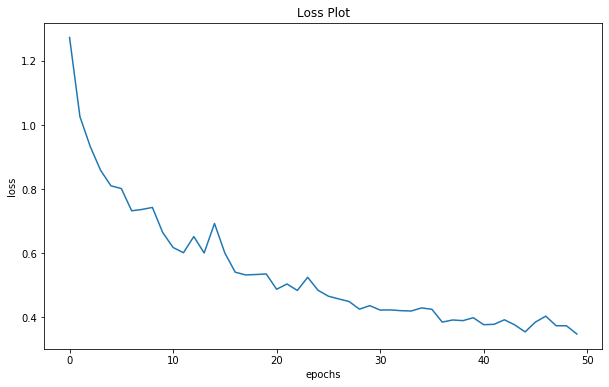

In [19]:
plt.figure(figsize=(10,6))
plt.plot(hist['loss'])
plt.title('Loss Plot')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('loss_plot_2.jpg')
plt.show()

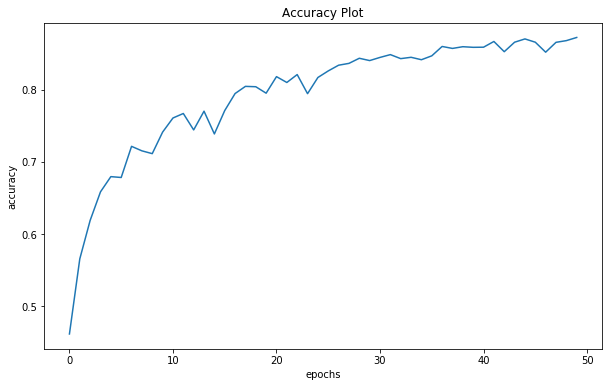

In [20]:
plt.figure(figsize=(10,6))
plt.plot(hist['acc'])
plt.title('Accuracy Plot')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.savefig('accuracy_plot.jpg')
plt.show()